## Exploratory Data Analysis

In [1]:
# packages
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/calebreed/Documents/GitHub/DATA-4950-Capstone/DATA-4950-Capstone/data/external/salaries_clean.csv')

In [3]:
df.head()

index  salary_id       employer_name      location_name location_state  \
0      0          1              opower  san francisco, ca             CA   
1      1          3             walmart    bentonville, ar             AR   
2      2          4  vertical knowledge      cleveland, oh             OH   
3      3          6              netapp            waltham            NaN   
4      4         12               apple          cupertino            NaN   

  location_country  location_latitude  location_longitude          job_title  \
0               US              37.77             -122.41   systems engineer   
1               US              36.36              -94.20   senior developer   
2               US              41.47              -81.67  software engineer   
3              NaN                NaN                 NaN                mts   
4              NaN                NaN                 NaN  software engineer   

  job_title_category job_title_rank  total_experience_years  \
0        Engineering            NaN                    13.0   
1           Software         Senior                    15.0   
2           Software            NaN                     4.0   
3              Other            NaN                     4.0   
4           Software            NaN                     4.0   

   employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  \
0                        2.0         125000.0         5000.0           0.0   
1                        8.0          65000.0            NaN        5000.0   
2                        1.0          86000.0         5000.0        6000.0   
3                        0.0         105000.0         5000.0        8500.0   
4                        3.0         110000.0         5000.0        7000.0   

  stock_value_bonus          comments   submitted_at  
0       5000 shares  Don't work here.  3/21/16 12:58  
1             3,000               NaN  3/21/16 12:58  
2                 0               NaN  3/21/16 12:59  
3                 0               NaN  3/21/16 13:00  
4            150000               NaN  3/21/16 13:02

In [4]:
df.nunique()

index                        1655
salary_id                    1655
employer_name                1068
location_name                 647
location_state                 44
location_country               54
location_latitude             182
location_longitude            190
job_title                     675
job_title_category              8
job_title_rank                  7
total_experience_years         49
employer_experience_years      47
annual_base_pay               441
signing_bonus                  83
annual_bonus                  152
stock_value_bonus             234
comments                      283
submitted_at                  744
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1655 non-null   int64  
 1   salary_id                  1655 non-null   int64  
 2   employer_name              1651 non-null   object 
 3   location_name              1655 non-null   object 
 4   location_state             558 non-null    object 
 5   location_country           792 non-null    object 
 6   location_latitude          792 non-null    float64
 7   location_longitude         792 non-null    float64
 8   job_title                  1655 non-null   object 
 9   job_title_category         1655 non-null   object 
 10  job_title_rank             425 non-null    object 
 11  total_experience_years     1608 non-null   float64
 12  employer_experience_years  1608 non-null   float64
 13  annual_base_pay            1651 non-null   float

In [6]:
# generates pandas profile for dataset summary
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_notebook_iframe()

/Users/calebreed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  
Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]


In [7]:
df.head()

df_index  salary_id       employer_name      location_name location_state  \
0         0          1              opower  san francisco, ca             CA   
1         1          3             walmart    bentonville, ar             AR   
2         2          4  vertical knowledge      cleveland, oh             OH   
3         3          6              netapp            waltham            NaN   
4         4         12               apple          cupertino            NaN   

  location_country  location_latitude  location_longitude          job_title  \
0               US              37.77             -122.41   systems engineer   
1               US              36.36              -94.20   senior developer   
2               US              41.47              -81.67  software engineer   
3              NaN                NaN                 NaN                mts   
4              NaN                NaN                 NaN  software engineer   

  job_title_category job_title_rank  total_experience_years  \
0        Engineering            NaN                    13.0   
1           Software         Senior                    15.0   
2           Software            NaN                     4.0   
3              Other            NaN                     4.0   
4           Software            NaN                     4.0   

   employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  \
0                        2.0         125000.0         5000.0           0.0   
1                        8.0          65000.0            NaN        5000.0   
2                        1.0          86000.0         5000.0        6000.0   
3                        0.0         105000.0         5000.0        8500.0   
4                        3.0         110000.0         5000.0        7000.0   

  stock_value_bonus          comments   submitted_at  
0       5000 shares  Don't work here.  3/21/16 12:58  
1             3,000               NaN  3/21/16 12:58  
2                 0               NaN  3/21/16 12:59  
3                 0               NaN  3/21/16 13:00  
4            150000               NaN  3/21/16 13:02

In [14]:
# displays missing values
df.isna().sum()

employer_name                  4
location_name                  0
job_title                      0
job_title_category             0
total_experience_years        47
employer_experience_years     47
annual_base_pay                4
signing_bonus                323
annual_bonus                 319
stock_value_bonus            402
dtype: int64

In [6]:
# drop unneccessary variables
df = df.drop(["index","salary_id","location_latitude","location_longitude","comments","submitted_at"],axis=1)
# job_title_rank, location_state, and location_country have too many missing values so they will be dropped
df = df.drop(['job_title_rank','location_state','location_country'],axis=1)

<AxesSubplot:>

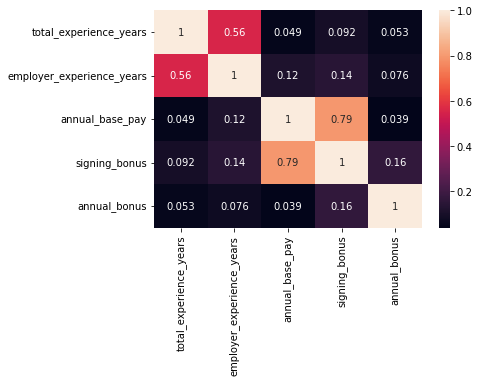

In [7]:
import seaborn as sns
import matplotlib as plt

# plots heatmap to check for correlations in data
sns.heatmap(df.corr(), annot=True)

### Conclusion
Will need to fill missing values for the rest of the columns. annual base pay and signing bonus are highly correlated. Will probably drop employer_experience_years or total_experience_years.

In [8]:
# drops employer experience years
df = df.drop("employer_experience_years",axis=1)

In [10]:
# checks for missing values
df.isna().sum()

employer_name               4
location_name               0
job_title                   0
job_title_category          0
total_experience_years     47
annual_base_pay             4
signing_bonus             323
annual_bonus              319
stock_value_bonus         402
dtype: int64

In [11]:
df.head()

employer_name      location_name          job_title  \
0              opower  san francisco, ca   systems engineer   
1             walmart    bentonville, ar   senior developer   
2  vertical knowledge      cleveland, oh  software engineer   
3              netapp            waltham                mts   
4               apple          cupertino  software engineer   

  job_title_category  total_experience_years  annual_base_pay  signing_bonus  \
0        Engineering                    13.0         125000.0         5000.0   
1           Software                    15.0          65000.0            NaN   
2           Software                     4.0          86000.0         5000.0   
3              Other                     4.0         105000.0         5000.0   
4           Software                     4.0         110000.0         5000.0   

   annual_bonus stock_value_bonus  
0           0.0       5000 shares  
1        5000.0             3,000  
2        6000.0                 0  
3        8500.0                 0  
4        7000.0            150000

In [12]:
# fill experience missing values with the mean
df.loc[:, "total_experience_years"] = df.loc[:, "total_experience_years"].fillna(df["total_experience_years"].mean())

In [17]:
# locates missing employer names
mask = df['employer_name'].isnull()
print(df[mask])

     employer_name        location_name                         job_title  \
464            NaN  interior bc, canada  software engineer (intermediate)   
612            NaN              germany      post doc in computer science   
947            NaN           pittsburgh                 robotics engineer   
1184           NaN             auckland                senior sw engineer   

     job_title_category  total_experience_years  annual_base_pay  \
464            Software                     7.0         100000.0   
612     Applied Science                     7.0          60480.0   
947         Engineering                     3.0          93000.0   
1184        Engineering                    18.0         140000.0   

      signing_bonus  annual_bonus stock_value_bonus  
464             0.0           0.0                 0  
612             0.0           0.0                 0  
947             0.0        6000.0               NaN  
1184            NaN           NaN               NaN  


In [18]:
df.loc[:, "employer_name"] = df.loc[:, "employer_name"].fillna("Unknown")

In [19]:
df.isna().sum()

employer_name               0
location_name               0
job_title                   0
job_title_category          0
total_experience_years      0
annual_base_pay             4
signing_bonus             323
annual_bonus              319
stock_value_bonus         402
dtype: int64

In [23]:
df.loc[:, "annual_base_pay"] = df.loc[:, "annual_base_pay"].fillna(df["annual_base_pay"].mean())
df.loc[:, "signing_bonus"] = df.loc[:, "signing_bonus"].fillna(df["signing_bonus"].mean())
df.loc[:, "annual_bonus"] = df.loc[:, "annual_bonus"].fillna(df["annual_bonus"].mean())
# stock bonus is a string so will be dropping it
df = df.drop("stock_value_bonus",axis=1)
df.isna().sum()

employer_name             0
location_name             0
job_title                 0
job_title_category        0
total_experience_years    0
annual_base_pay           0
signing_bonus             0
annual_bonus              0
dtype: int64

All missing values have been filled. Data set is ready for model building